In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [11]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.36.181.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.36.181.10:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [43]:
"""
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot


import warnings                      
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook   bu notebook zorlar ancak interaktif olarak imkan sağlar.

plt.rcParams["figure.figsize"] = (10,6)   # tüm grafikleri bu ölcüye sabitledik.
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")             # çizime özel yapılabilsede gridleri beyaz yaptı.
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # tüm floatları virgülden sonra 3 karakter verir.

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
"""

In [11]:
df = pd.read_csv("/content/drive/MyDrive/creditcard1.csv")

In [16]:
!pip install pycaret

     |████████████████████████████████| 320 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 56.1 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 261 kB 54.9 MB/s 
     |████████████████████████████████| 1.3 MB 30.6 MB/s 
     |████████████████████████████████| 16.8 MB 835 kB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
     |████████████████████████████████| 1.7 MB 52.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 54.0 MB/s 
     |████████████████████████████████| 116 kB 59.2 MB/s 
     |████████████████████████████████| 6.8 MB 38.3 MB/s 
     |████████████████████████████████| 3.1 MB 50.6 MB/s 
     |████████████████████████████████| 690 kB 57.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████

The first step to setting up the environment is to import a module.
Depending upon the type of experiment needed to be performed.

The second step is to initialize the setup:
It is a mandatory step that should be done before any machine learning experiment.

As you know PyCaret helps in model deployment too, so all the experiment done is saved in a pipeline and this pipeline can be deployed into production with ease.

The Setup step covers a wide range of pre-processing tasks like:
Data Type Inference:
- It helps determine the correct data types for all the features.
Data Cleaning and Preparation:
- It automatically imputes the missing values present in the data.
- By default, the numerical values are imputed with mean and the categorical data are imputed with the mode.
- Also, Encoding of the categorical features is performed automatically.
Train Test Split:
- It automatically splits the data into train and test for modeling. In the case of classification problems, it uses stratified splits.
- By default, the split ratio is 70% train and 30% test. However, this can be changed by using a parameter within the setup. “train_size”.
- Evaluation of every ML model and hyperparameter optimization is done using K-Fold Cross-Validation.
Assigning Session ID as seed:
- Session id is a pseudo-random number generated by default if no session_id parameter is passed.
- PyCaret distributes this id as a seed in all the functions to isolate the effect of randomization.
- This allows for reproducibility at later date in the same or different environment.

In [12]:
from pycaret.classification import *
clf = setup(
            data=df, 
            target='Class', 
            session_id=44, 
            train_size=0.8,
            fold = 3,
            normalize=True,
            normalize_method= "minmax"
           )

,Description,Value
0,session_id,44
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Compare models
This function compares each model present in the PyCaret depending upon the problem statement.
Training of every model is done using the default hyperparameters and evaluates performance metrics using the cross-validation.

The output of the function is a table showing the average score of all models across the folds. The number of folds can be defined using the fold parameters within the compare_models function. By default, the fold is set to 10. The table is sorted (highest to lowest) by the metric of choice and can be defined using the sort parameter. By default, the table is sorted by Accuracy for classification experiments and R2 for regression experiments. Certain models are prevented for comparison because of their longer run-time. To bypass this prevention, the turbo parameter can be set to False.
To select the top n numbers of the model, include n_select hyperparameter within the compare_models function.

We can even sort it using the metrics.

In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.000,0.916,0.745,0.937,0.829,0.829,0.835,235.997
rf,Random Forest Classifier,1.000,0.937,0.778,0.922,0.844,0.843,0.847,106.010
et,Extra Trees Classifier,1.000,0.942,0.781,0.942,0.854,0.853,0.857,15.217
lda,Linear Discriminant Analysis,0.999,0.897,0.740,0.871,0.799,0.798,0.802,1.213
ada,Ada Boost Classifier,0.999,0.971,0.702,0.813,0.753,0.752,0.754,37.543
gbc,Gradient Boosting Classifier,0.999,0.777,0.610,0.888,0.723,0.722,0.735,198.873
dt,Decision Tree Classifier,0.999,0.880,0.760,0.738,0.749,0.748,0.748,10.657
svm,SVM - Linear Kernel,0.999,0.000,0.538,0.875,0.664,0.663,0.684,0.573
lr,Logistic Regression,0.999,0.977,0.523,0.868,0.650,0.649,0.672,5.380
ridge,Ridge Classifier,0.999,0.000,0.434,0.853,0.572,0.572,0.606,0.397


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [19]:
print(best_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


Creating Models
Creating a model in PyCaret is one of the simplest tasks.
The “create_model” function takes in just the model ID as a string and performs the task.

To use cross-validation during the training, we can include one more parameter “fold” inside the create_model function.
By default, the fold is set to 10.

After performing this we get a table of all the metrics rounded up to 4 decimal digits as an output.
Classification: Accuracy, AUC, Recall, Precision, F1, Kappa, MCC
Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

→ Classification:
+------------+---------------------------------+
|     ID     |              Name               |
+------------+---------------------------------+
| ‘lr’       | Logistic Regression             |
| ‘knn’      | K Nearest Neighbour             |
| ‘nb’       | Naives Bayes                    |
| ‘dt’       | Decision Tree Classifier        |
| ‘svm’      | SVM – Linear Kernel             |
| ‘rbfsvm’   | SVM – Radial Kernel             |
| ‘gpc’      | Gaussian Process Classifier     |
| ‘mlp’      | Multi Level Perceptron          |
| ‘ridge’    | Ridge Classifier                |
| ‘rf’       | Random Forest Classifier        |
| ‘qda’      | Quadratic Discriminant Analysis |
| ‘ada’      | Ada Boost Classifier            |
| ‘gbc’      | Gradient Boosting Classifier    |
| ‘lda’      | Linear Discriminant Analysis    |
| ‘et’       | Extra Trees Classifier          |
| ‘xgboost’  | Extreme Gradient Boosting       |
| ‘lightgbm’ | Light Gradient Boosting         |
| ‘catboost’ | CatBoost Classifier             |
+------------+---------------------------------


Regression:
+------------+-----------------------------------+
|     ID     |               Name                |
+------------+-----------------------------------+
| ‘lr’       | Linear Regression                 |
| ‘lasso’    | Lasso Regression                  |
| ‘ridge’    | Ridge Regression                  |
| ‘en’       | Elastic Net                       |
| ‘lar’      | Least Angle Regression            |
| ‘llar’     | Lasso Least Angle Regression      |
| ‘omp’      | Orthogonal Matching Pursuit       |
| ‘br’       | Bayesian Ridge                    |
| ‘ard’      | Automatic Relevance Determination |
| ‘par’      | Passive Aggressive Regressor      |
| ‘ransac’   | Random Sample Consensus           |
| ‘tr’       | TheilSen Regressor                |
| ‘huber’    | Huber Regressor                   |
| ‘kr’       | Kernel Ridge                      |
| ‘svm’      | Support Vector Machine            |
| ‘knn’      | K Neighbors Regressor             |
| ‘dt’       | Decision Tree                     |
| ‘rf’       | Random Forest                     |
| ‘et’       | Extra Trees Regressor             |
| ‘ada’      | AdaBoost Regressor                |
| ‘gbr’      | Gradient Boosting Regressor       |
| ‘mlp’      | Multi Level Perceptron            |
| ‘xgboost’  | Extreme Gradient Boosting         |
| ‘lightgbm’ | Light Gradient Boosting           |
| ‘catboost’ | CatBoost Regressor                |
+------------+-----------------------------------

Clustering:
+-------------+----------------------------------+
|     ID      |               Name               |
+-------------+----------------------------------+
| ‘kmeans’    | K-Means Clustering               |
| ‘ap’        | Affinity Propagation             |
| ‘meanshift’ | Mean shift Clustering            |
| ‘sc’        | Spectral Clustering              |
| ‘hclust’    | Agglomerative Clustering         |
| ‘dbscan’    | Density-Based Spatial Clustering |
| ‘optics’    | OPTICS Clustering                |
| ‘birch’     | Birch Clustering                 |
| ‘kmodes’    | K-Modes Clustering               |

→ Anomaly Detection:
+-------------+-----------------------------------+
|     ID      |               Name                |
+-------------+-----------------------------------+
| ‘abod’      | Angle-base Outlier Detection      |
| ‘iforest’   | Isolation Forest                  |
| ‘cluster’   | Clustering-Based Local Outlier    |
| ‘cof’       | Connectivity-Based Outlier Factor |
| ‘histogram’ | Histogram-based Outlier Detection |
| ‘knn’       | k-Nearest Neighbors Detector      |
| ‘lof’       | Local Outlier Factor              |
| ‘svm’       | One-class SVM detector            |
| ‘pca’       | Principal Component Analysis      |
| ‘mcd’       | Minimum Covariance Determinant    |
| ‘sod’       | Subspace Outlier Detection        |
| ‘sos        | Stochastic Outlier Selection      

→ NLP:
+-------+-----------------------------------+
|  ID   |               Model               |
+-------+-----------------------------------+
| ‘lda’ | Latent Dirichlet Allocation       |
| ‘lsi’ | Latent Semantic Indexing          |
| ‘hdp’ | Hierarchical Dirichlet Process    |
| ‘rp’  | Random Projections                |
| ‘nmf’ | Non-Negative Matrix Factorization |

Tune Model
It provides just one line function to perform hyperparameter tuning of any model present in the PyCaret Library.
It tunes the hyperparameter of the model passed as an estimator using a Random grid search with pre-defined grids that are fully customizable.

First, create a model

Tune the model

In [13]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9217,0.7557,0.9429,0.8390,0.8387,0.8439
1,0.9995,0.9405,0.7846,0.9189,0.8465,0.8462,0.8489
2,0.9995,0.9491,0.7939,0.9043,0.8455,0.8453,0.8471
Mean,0.9995,0.9371,0.7781,0.9220,0.8437,0.8434,0.8466
Std,0.0000,0.0114,0.0163,0.0159,0.0033,0.0033,0.0021


In [14]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)


In [15]:
create_app(rf)   # Bu şekilde kullanmak için grodio import etmek gerekiyor. Ancak api ile kullanabilmek için aşağıdaki toolları install etmek ve aşağıdaki codeları çalıştırmak gerekir.

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://28550.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f1229e65210>,
 'http://127.0.0.1:7863/',
 'https://28550.gradio.app')

In [37]:
!pip install fastapi

     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 


In [39]:
!pip install uvicorn

     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 58 kB 3.7 MB/s 


In [40]:
create_api(rf, "api_rf")

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                                  target='Class')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('re


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python api_rf.py
    


In [ ]:
!python api_rf.py

Plot a Model

It helps in checking the performance of a model with different graphs in one line of code.

→ Classification:
+-----------------------------+--------------------+
|            Name             |        Plot        |
+-----------------------------+--------------------+
| Area Under the Curve        | ‘auc’              |
| Discrimination Threshold    | ‘threshold’        |
| Precision Recall Curve      | ‘pr’               |
| Confusion Matrix            | ‘confusion_matrix’ |
| Class Prediction Error      | ‘error’            |
| Classification Report       | ‘class_report’     |
| Decision Boundary           | ‘boundary’         |
| Recursive Feature Selection | ‘rfe’              |
| Learning Curve              | ‘learning’         |
| Manifold Learning           | ‘manifold’         |
| Calibration Curve           | ‘calibration’      |
| Validation Curve            | ‘vc’               |
| Dimension Learning          | ‘dimension’        |
| Feature Importance          | ‘feature’          |
| Model Hyperparameter        | ‘parameter’        |

→ Regression:
+-----------------------------+-------------+
|            Name             |    Plot     |
+-----------------------------+-------------+
| Residuals Plot              | ‘residuals’ |
| Prediction Error Plot       | ‘error’     |
| Cooks Distance Plot         | ‘cooks’     |
| Recursive Feature Selection | ‘rfe’       |
| Learning Curve              | ‘learning’  |
| Validation Curve            | ‘vc’        |
| Manifold Learning           | ‘manifold’  |
| Feature Importance          | ‘feature’   |
| Model Hyperparameter        | ‘parameter’ |

→ Clustering:
+-----------------------+----------------+
| Cluster PCA Plot (2d) |   ‘cluster’    |
+-----------------------+----------------+
| Cluster TSnE (3d)     | ‘tsne’         |
| Elbow Plot            | ‘elbow’        |
| Silhouette Plot       | ‘silhouette’   |
| Distance Plot         | ‘distance’     |
| Distribution Plot     | ‘distribution’ |
+-----------------------+----------------+

→ Anomaly Detection:
+---------------------------+--------+
| t-SNE (3d) Dimension Plot | ‘tsne’ |
+---------------------------+--------+
| UMAP Dimensionality Plot  | ‘umap’ |

→ Natural Language Processing:
+---------------------------+----------------------+
|           Name            |         Plot         |
+---------------------------+----------------------+
| Word Token Frequency      | ‘frequency’          |
| Word Distribution Plot    | ‘distribution’       |
| Bigram Frequency Plot     | ‘bigram’             |
| Trigram Frequency Plot    | ‘trigram’            |
| Sentiment Polarity Plot   | ‘sentiment’          |
| Part of Speech Frequency  | ‘pos’                |
| t-SNE (3d) Dimension Plot | ‘tsne’               |
| Topic Model (pyLDAvis)    | ‘topic_model’        |
| Topic Infer Distribution  | ‘topic_distribution’ |
| Word cloud                | ‘wordcloud’          |
| UMAP Dimensionality Plot  | ‘umap                |

In [ ]:
tuned_rf = tune_model(rf)

In [25]:
from pycaret.classification import *

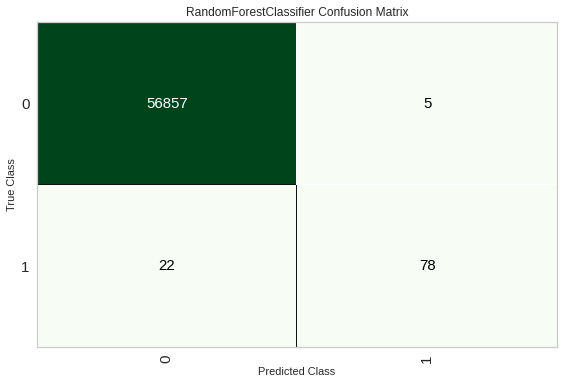

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(rf,plot='confusion_matrix')

In [ ]:
plot_model(tuned_rf,plot='confusion_matrix')

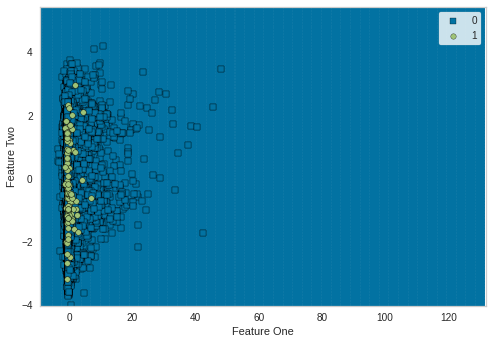

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(rf, plot = 'boundary')

In [ ]:
plot_model(tuned_rf, plot = 'boundary')

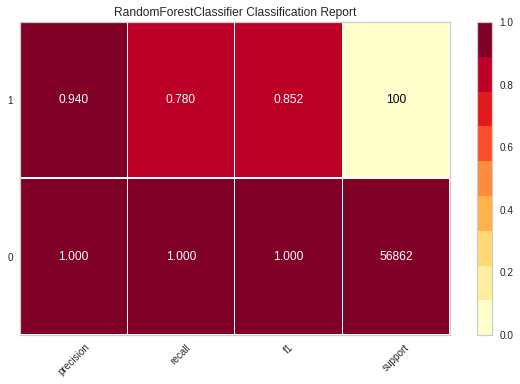

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(rf, plot = 'class_report')

In [ ]:
plot_model(tuned_rf, plot = 'class_report')

Interpret Model
After building a model one of the most important task is to interpret the results.
Model Interpretability helps debug the model by analyzing what the model really thinks is important.
model = create_model('Model_name')
interpret_model(model)

In [30]:
predict_model(rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.000,0.928,0.780,0.940,0.853,0.852,0.856


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.879,0.992,0.768,0.817,0.302,0.766,0.255,0.266,0.784,0.467,...,0.666,0.382,0.643,0.353,0.416,0.312,0.000,0,0,1.000
1,0.770,0.947,0.761,0.855,0.101,0.770,0.260,0.267,0.785,0.520,...,0.662,0.409,0.642,0.296,0.416,0.312,0.002,0,0,1.000
2,0.834,0.951,0.782,0.825,0.290,0.776,0.260,0.276,0.782,0.440,...,0.662,0.462,0.633,0.352,0.424,0.315,0.003,0,0,1.000
3,0.842,0.854,0.818,0.775,0.264,0.732,0.259,0.232,0.815,0.452,...,0.686,0.448,0.528,0.458,0.378,0.306,0.000,0,0,1.000
4,0.354,0.925,0.759,0.849,0.251,0.773,0.248,0.263,0.792,0.460,...,0.663,0.395,0.618,0.484,0.416,0.309,0.000,0,0,0.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,0.413,0.977,0.769,0.845,0.306,0.765,0.264,0.265,0.787,0.466,...,0.664,0.385,0.667,0.372,0.417,0.313,0.000,0,0,1.000
56958,0.999,0.961,0.771,0.842,0.188,0.764,0.258,0.265,0.785,0.427,...,0.665,0.376,0.550,0.384,0.420,0.319,0.001,0,0,0.990
56959,0.449,0.953,0.779,0.843,0.286,0.766,0.261,0.269,0.788,0.434,...,0.665,0.324,0.632,0.379,0.415,0.313,0.003,0,0,1.000
56960,0.238,0.973,0.762,0.854,0.302,0.760,0.264,0.263,0.787,0.473,...,0.663,0.381,0.646,0.365,0.417,0.314,0.006,0,0,1.000


In [ ]:
predict_model(tuned_rf)

In [31]:
finalized_rf = finalize_model(rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impu

In [ ]:
finalized_tuned_rf = finalize_model(tuned_rf)

Finalize Model
It is the last step of building a model in PyCaret.
This function takes a trained model object and returns a model that has been trained on the entire dataset.
model = create_model('Model_name')
finalize_model(model)

In [32]:
save_model(finalized_rf, 'fraud_rf_v1')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False), model_name=fraud_rf_v1, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [ ]:
save_model(finalized_tuned_rf, 'fraud_tuned_rf_v1')

In [33]:
fraud_rf_saved = load_model('fraud_rf_v1')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=fraud_rf_v1, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
# predict on new data
new_data = df.copy()
new_data.drop('Class', axis = 1, inplace = True)
predict_model(fraud_rf_saved, raw_score = True, data = new_data, probability_threshold = 0.3)

In [ ]:
# deploy a model
deploy_model(fraud_rf_saved, model_name = 'rf_aws', platform = 'aws', authentication = { 'bucket'  : 'pycaret-test' })

In [ ]:
fraud_tuned_rf_saved = load_model('fraud_tuned_rf_v1')

In [ ]:
Deploy Model:

Once a model is finalized after experimenting on the dataset it can be saved using the “save_model” function.

The “save_model” saves the pipeline and the trained model this can be used in applications as a binary pickle file.

An alternative and a low code possibility to deploy the model on the cloud can be done using PyCaret’s “deploy_model” function.

Models can easily be deployed in AWS using the PyCaret.

Before deploying a model to an AWS S3 (‘aws’), environment variables must be configured using the command-line interface. To configure AWS environment variables, type aws configure in your python command line. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:
AWS Access Key ID
AWS Secret Key Access
Default Region Name (can be seen under Global settings on your AWS console)
Default output format (must be left blank)

model = create_model('Model_name')
final_model = finalize_model(model)
deploy_model(final_model, model_name = 'Model_name_aws', platform = 'aws', 
             authentication = {'bucket' : 'pycaret-test'})

This deployed model can also be used to predict.

predictions = predict_model(model_name = 'lr_aws', data = data_unseen, platform = 'aws', authentication = { 'bucket' : 'pycaret-test' })

In [2]:
from pycaret.datasets import get_data
data = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
from pycaret.regression import *
s = setup(data, target="Price")

,Description,Value
0,session_id,5484
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [4]:
dt = create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,943.9621,4.098115e+06,2024.3802,0.9662,0.0938,0.0679
1,945.7785,3.367461e+06,1835.0642,0.9626,0.1116,0.0805
2,1058.7502,4.971804e+06,2229.7542,0.9568,0.1134,0.0800
3,986.9681,6.537989e+06,2556.9491,0.9425,0.1119,0.0786
4,966.7635,4.817901e+06,2194.9717,0.9578,0.1071,0.0778
5,1120.2358,7.672629e+06,2769.9510,0.9337,0.1029,0.0749
6,912.8750,3.825351e+06,1955.8506,0.9651,0.0973,0.0731
7,1072.0392,5.640204e+06,2374.9114,0.9484,0.1064,0.0793
8,944.4903,7.837557e+06,2799.5637,0.9036,0.1125,0.0756


In [60]:
!pip install gradio  # gradio yüklemek yeterli. Bu env.daki toollar ile çalışıyor.

  Using cached gradio-2.9.4-py3-none-any.whl (2.9 MB)


In [5]:
create_app(dt)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://52917.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f1229e65210>,
 'http://127.0.0.1:7861/',
 'https://52917.gradio.app')

In [1]:
from pycaret.datasets import get_data
boston = get_data('boston')

from pycaret.regression import *
exp_name = setup(data = boston,  target = 'medv')

lr = create_model('lr')
create_app(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2780,42.3256,6.5058,0.6809,0.2478,0.1640
1,3.1333,14.5833,3.8188,0.8261,0.2153,0.1878
2,3.6454,24.1088,4.9101,0.5991,0.2288,0.1840
3,4.0507,29.4756,5.4291,0.7679,0.1908,0.1593
4,3.3146,20.1320,4.4869,0.6676,0.3822,0.1997
5,4.1002,34.9267,5.9099,0.4855,0.2332,0.1977
6,3.6333,26.0148,5.1005,0.6637,0.2333,0.1863
7,3.4816,29.3896,5.4212,0.7158,0.2118,0.1890
8,3.2230,19.6565,4.4336,0.4910,0.4773,0.1646


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22749.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f1229e65210>,
 'http://127.0.0.1:7860/',
 'https://22749.gradio.app')

In [8]:
import gradio as gr

def greet(name):
  return "Hello " + name + "!!"

iface = gr.Interface(fn=greet, inputs="text", outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://31480.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f1229e65210>,
 'http://127.0.0.1:7862/',
 'https://31480.gradio.app')